In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import lightgbm as gbm
from sklearn.metrics import roc_auc_score
import matplotlib.pylab as plt
import pickle

In [2]:
df = pd.read_csv("../data/train_fft_final.csv")
#cols = df.columns.tolist()
#cols[0:118]

In [3]:
df2 = df.copy()

features_drop = ['target','Unnamed: 0','ID','location']
X=df2.drop(features_drop,axis=1)
y=df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,max_depth=6, random_state=42)
model.fit(X_train, y_train)


print(model.score(X_test, y_test))
print(model.predict(X_test))

0.4712915462014877
[80.29398431 56.72078117 84.36639582 ... 64.23685049 51.95519032
 55.62366646]


In [5]:
y_pred=model.predict(X_test)

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 121
Average maximum depth 6


In [6]:
np.sum((np.array(y_pred )-np.array(y_test))**2)**0.5/len(y_test)

0.4580465111262898

In [7]:
print(np.array(y_test))
print(np.array(y_pred))
y_train_pred=model.predict(X_train)
np.sum((np.array(y_train_pred )-np.array(y_train))**2)**0.5/len(y_train)

[37.692      64.73638298 46.25021739 ... 51.89765957 26.70681818
 67.26516129]
[80.29398431 56.72078117 84.36639582 ... 64.23685049 51.95519032
 55.62366646]


0.26742301211074343

In [8]:
def result_to_category(liste):
    
    list_category = []
    
    for i in liste:
        if  i < 13:
            c = "1"
            list_category.append(c)
        elif i >= 13 and i < 36:
            c = "2"
            list_category.append(c)
        elif i >= 36 and i < 56:
            c = "3"
            list_category.append(c)
        elif i >= 56 and i < 151:
            c = "4"
            list_category.append(c)
        elif i >= 151 and i < 250:
            c = "5"
            list_category.append(c)
        elif i >= 250:
            c = "6"
            list_category.append(c)
            
    return list_category

In [9]:
from sklearn.metrics import confusion_matrix

y_test_array=y_test.values

y_test_category=result_to_category(y_test_array)
y_pred_category=result_to_category(model.predict(X_test))

confusion_matrix(y_test_category, y_pred_category)

array([[   0,   50,   42,    8,    0,    0],
       [   0,  399,  744,  127,    0,    0],
       [   0,  124,  885,  564,    0,    0],
       [   0,   22,  491, 1004,   17,    0],
       [   0,    0,    8,  110,   31,    0],
       [   0,    0,    1,   13,   22,    0]])

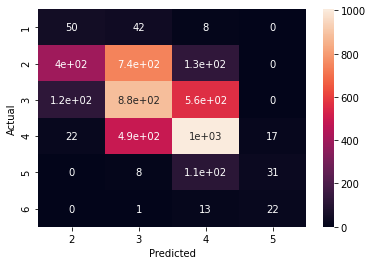

In [10]:
data = {'y_Actual':   y_test_category,
        'y_Predicted': y_pred_category
        }

df_matrix = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_matrix['y_Actual'], df_matrix['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [11]:
np.unique(y_pred_category)

array(['2', '3', '4', '5'], dtype='<U1')

In [12]:
from sklearn.metrics import classification_report

df_matrix = classification_report(y_test_category,y_pred_category)
print('Classification report : \n',df_matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       100
           2       0.67      0.31      0.43      1270
           3       0.41      0.56      0.47      1573
           4       0.55      0.65      0.60      1534
           5       0.44      0.21      0.28       149
           6       0.00      0.00      0.00        36

    accuracy                           0.50      4662
   macro avg       0.35      0.29      0.30      4662
weighted avg       0.52      0.50      0.48      4662

/Users/lina/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lina/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classifica